In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [3]:
data=pd.read_csv('ecommerce_customer_data.csv')
data.head()

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0
1,2,Male,25,Kolkata,Tablet,30,38,9,4
2,3,Male,32,Bangalore,Desktop,37,13,5,0
3,4,Male,35,Delhi,Mobile,7,20,10,3
4,5,Male,27,Bangalore,Tablet,35,20,8,2


In [4]:
numeric_summary=data.describe()
print(numeric_summary)

          User_ID         Age  Product_Browsing_Time  Total_Pages_Viewed  \
count  500.000000  500.000000             500.000000          500.000000   
mean   250.500000   26.276000              30.740000           27.182000   
std    144.481833    5.114699              15.934246           13.071596   
min      1.000000   18.000000               5.000000            5.000000   
25%    125.750000   22.000000              16.000000           16.000000   
50%    250.500000   26.000000              31.000000           27.000000   
75%    375.250000   31.000000              44.000000           38.000000   
max    500.000000   35.000000              60.000000           50.000000   

       Items_Added_to_Cart  Total_Purchases  
count           500.000000       500.000000  
mean              5.150000         2.464000  
std               3.203127         1.740909  
min               0.000000         0.000000  
25%               2.000000         1.000000  
50%               5.000000         2.00

In [5]:
category_columns=data.describe(include='object')
print(category_columns)


       Gender Location Device_Type
count     500      500         500
unique      2        8           3
top      Male  Kolkata      Mobile
freq      261       71         178


Text(0.5, 0, 'Distribution by Age')

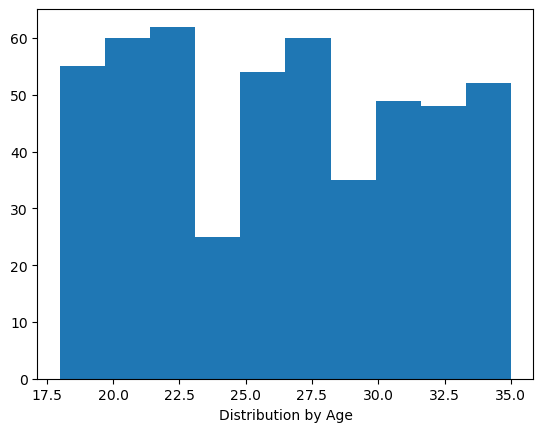

In [6]:
plt.hist(data=data,x='Age')
plt.xlabel('Distribution by Age')

   Gender  count
0    Male    261
1  Female    239


<Axes: xlabel='Gender', ylabel='Count'>

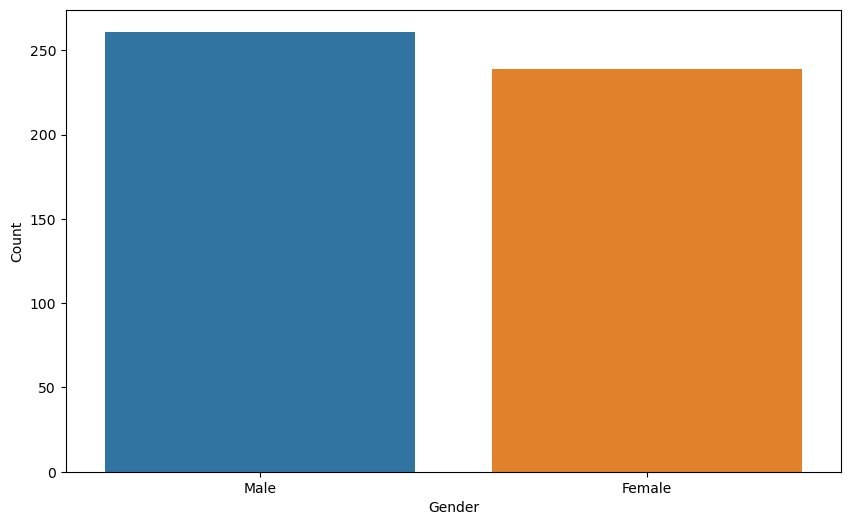

In [7]:
#distribution of age 

gender_counts=data['Gender'].value_counts().reset_index()
print(gender_counts)
gender_counts.columns=['Gender','Count']
plt.figure(figsize=(10,6))
sns.barplot(data=gender_counts,x='Gender',y='Count')

In [8]:
data.head()

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0
1,2,Male,25,Kolkata,Tablet,30,38,9,4
2,3,Male,32,Bangalore,Desktop,37,13,5,0
3,4,Male,35,Delhi,Mobile,7,20,10,3
4,5,Male,27,Bangalore,Tablet,35,20,8,2


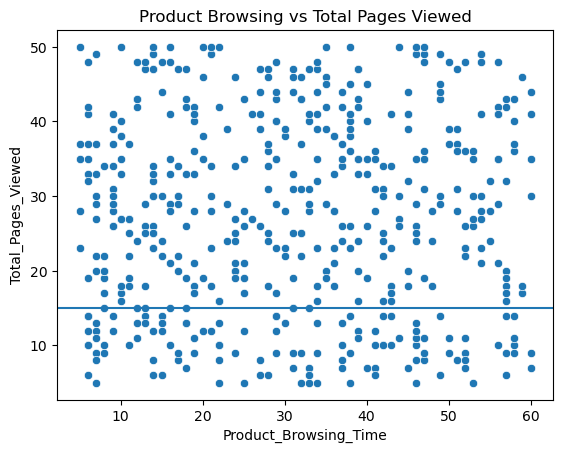

In [9]:
#gender distribution#relationship between the product browsing time and the total pages viewedplt.figure(figsize=(10,6))
#sns.scatterplot(data=data,x='Product_Browsing_Time',y='Total_Pages_Viewed',)
sns.scatterplot(data=data,x='Product_Browsing_Time',y='Total_Pages_Viewed')
plt.title('Product Browsing vs Total Pages Viewed')
import matplotlib.pyplot as plt

plt.axhline(y=15)




Text(0.5, 1.0, 'Total Pages viewed by Gender')

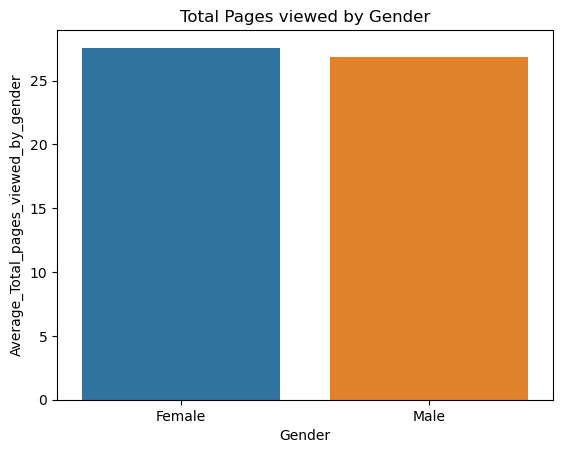

In [10]:
# average total pages viewed by gender:
gender_grouped=data.groupby('Gender')['Total_Pages_Viewed'].mean().reset_index()
gender_grouped.columns=['Gender','Average_Total_pages_viewed_by_gender']
sns.barplot(data=gender_grouped,x='Gender',y='Average_Total_pages_viewed_by_gender')
plt.title('Total Pages viewed by Gender')


<Axes: xlabel='Device_Type', ylabel='Average_total_pages_viewed'>

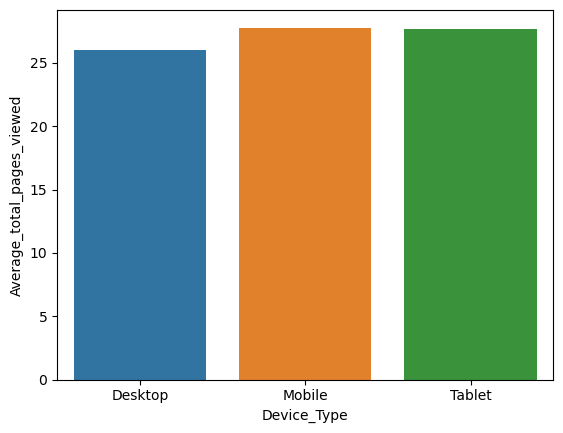

In [11]:
#average total pages viewed by devices
device_grouped=data.groupby('Device_Type')['Total_Pages_Viewed'].mean().reset_index()
device_grouped.columns=['Device_Type','Average_total_pages_viewed']
sns.barplot(data=device_grouped,x='Device_Type',y='Average_total_pages_viewed')

c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0, 0.5, 'Number of Customers')

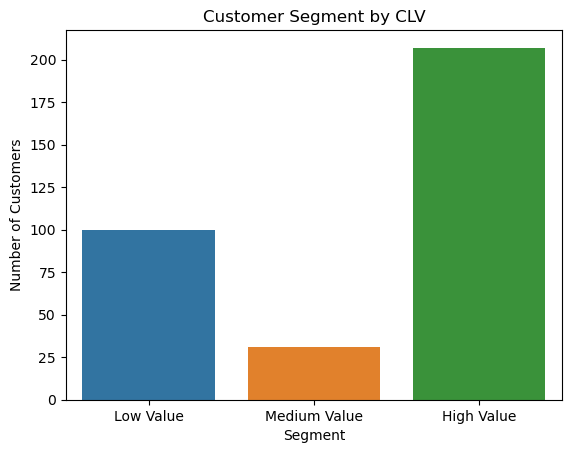

In [12]:
# calculate the customer lifetime value and visualize segments based on the customer lifetime value:
data['CLV']=(data['Total_Purchases']*data['Total_Pages_Viewed'])/data['Age']
data['segment']=pd.cut(data['CLV'],bins=[1,2,2.5,float('inf')],
                       labels=['Low Value','Medium Value','High Value'])
segment_counts=data['segment'].value_counts().reset_index()
segment_counts.columns=['Segment','Counts']

#Create a bar chart to visualize the customer segments
sns.barplot(data=segment_counts,x='Segment',y='Counts')
plt.title('Customer Segment by CLV')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')



In [13]:
data.head()

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases,CLV,segment
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0,0.000000,NaN
1,2,Male,25,Kolkata,Tablet,30,38,9,4,6.080000,High Value
2,3,Male,32,Bangalore,Desktop,37,13,5,0,0.000000,NaN
3,4,Male,35,Delhi,Mobile,7,20,10,3,1.714286,Low Value
4,5,Male,27,Bangalore,Tablet,35,20,8,2,1.481481,Low Value


Text(0.5, 1.0, 'Conversion Funnel')

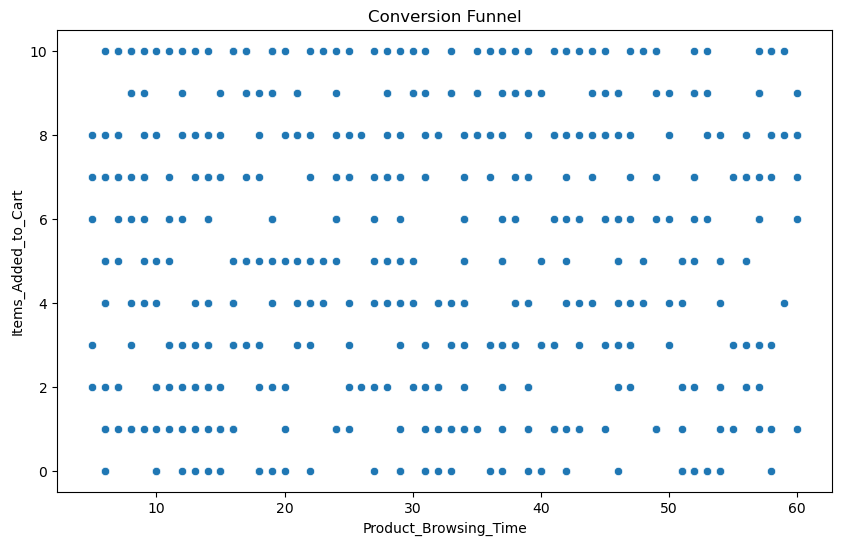

In [14]:
#conversion funnel data
plt.figure(figsize=(10,6))

funnel_data=data[['Product_Browsing_Time','Items_Added_to_Cart','Total_Purchases']]
funnel_data.groupby(['Product_Browsing_Time','Items_Added_to_Cart','Total_Purchases'])

sns.scatterplot(funnel_data, x='Product_Browsing_Time', y='Items_Added_to_Cart')
plt.title('Conversion Funnel')

In [15]:
print(funnel_data.head())

   Product_Browsing_Time  Items_Added_to_Cart  Total_Purchases
0                     60                    1                0
1                     30                    9                4
2                     37                    5                0
3                      7                   10                3
4                     35                    8                2


In [18]:
#churn rate of the customers
data['churndata']=data['Total_Purchases']==0
churn_rate=data['churndata'].mean()
print(churn_rate)

0.198
